In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb

In [129]:
file_path = "/Users/krishnadhiman/Downloads/diabetes_dataset.csv"
data = pd.read_csv(file_path)

In [131]:
data.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [133]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [137]:
data.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


In [139]:
data.isnull().sum()

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [141]:
HBA1C_THRESHOLD = 6.5
TARGET_COLUMN = 'Diabetes'
RANDOM_SEED = 42

In [183]:
if 'HbA1c' in data.columns:
    data['HbA1c'].value_counts().head()

In [185]:
if 'Alcohol_Consumption' in data.columns:
    if data['Alcohol_Consumption'].isnull().sum() > 0:
        if data['Alcohol_Consumption'].isnull().mean() * 100 > 30:
            data.drop('Alcohol_Consumption', axis=1, inplace=True)
        else:
            most_common = data['Alcohol_Consumption'].mode()[0]
            data['Alcohol_Consumption'].fillna(most_common, inplace=True)

In [187]:
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [189]:
data[TARGET_COLUMN] = (data['HbA1c'] >= HBA1C_THRESHOLD).astype(int)

data[TARGET_COLUMN].value_counts()

Diabetes
1    7784
0    2216
Name: count, dtype: int64

In [191]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data['BMI_Category'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels)

In [193]:
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Young', 'Adult', 'Middle_Age', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [195]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

In [197]:
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)
    data[col] = le.fit_transform(data[col])

data.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,BMI_Category,Age_Group
0,58,0,3,35.8,83.4,123.9,10.9,152,114,197.8,...,37.5,7.2,2,1538,2,0,1,1,1,1
1,48,1,0,24.1,71.4,183.7,12.8,103,91,261.6,...,88.5,6.1,2,2653,0,0,1,1,0,1
2,34,0,1,25.0,113.8,142.0,14.5,179,104,261.0,...,56.2,6.9,1,1684,1,1,0,1,2,0
3,62,1,0,32.7,100.4,167.4,8.8,176,118,183.4,...,34.4,5.4,1,3796,2,1,0,1,1,2
4,27,0,0,33.5,110.8,146.4,7.1,122,97,203.2,...,81.9,7.4,2,3161,0,0,0,1,1,3


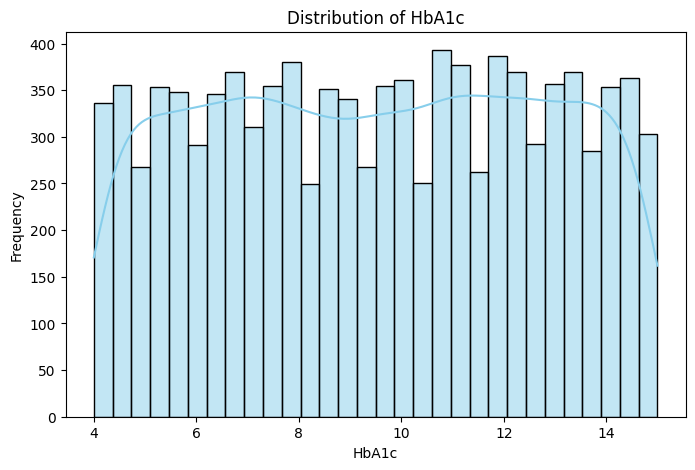

In [199]:
if 'HbA1c' in data.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data['HbA1c'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of HbA1c')
    plt.xlabel('HbA1c')
    plt.ylabel('Frequency')
    plt.show()

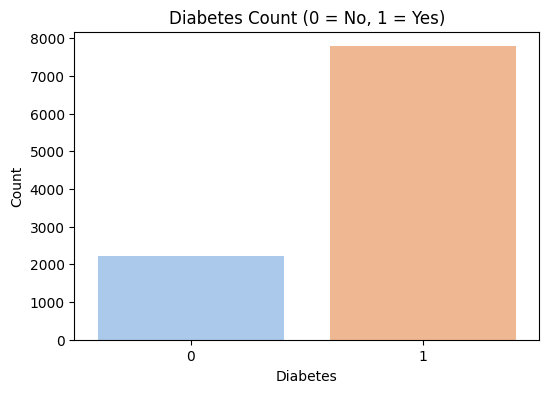

In [201]:
plt.figure(figsize=(6,4))
sns.countplot(x=TARGET_COLUMN, data=data, palette='pastel')
plt.title('Diabetes Count (0 = No, 1 = Yes)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

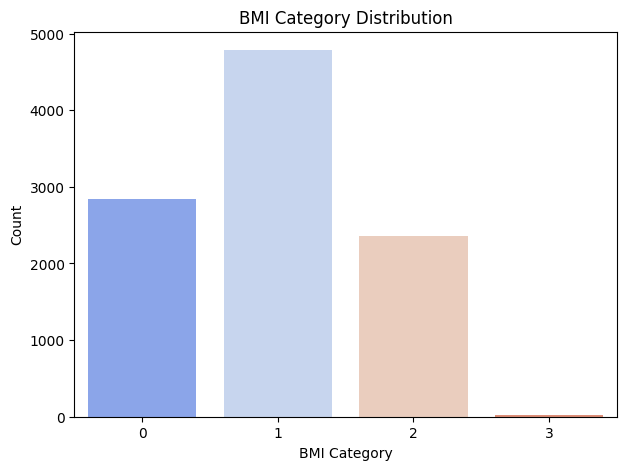

In [203]:
if 'BMI_Category' in data.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x='BMI_Category', data=data, palette='coolwarm')
    plt.title('BMI Category Distribution')
    plt.xlabel('BMI Category')
    plt.ylabel('Count')
    plt.show()

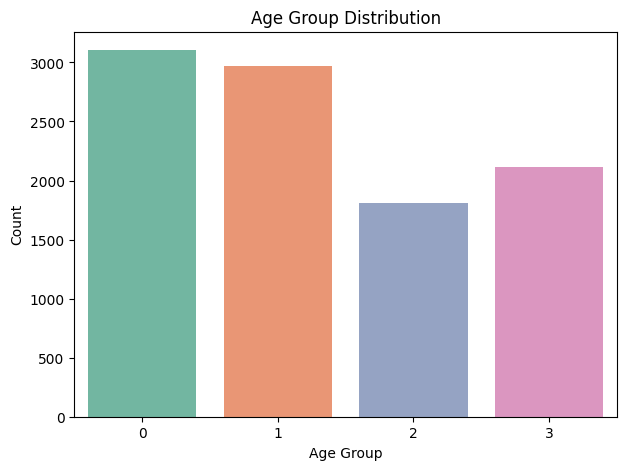

In [205]:
if 'Age_Group' in data.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x='Age_Group', data=data, palette='Set2')
    plt.title('Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.show()

In [207]:
X = data.drop(columns=[TARGET_COLUMN, 'HbA1c'])
y = data[TARGET_COLUMN]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

In [211]:
X_train.shape, X_test.shape

((8000, 20), (2000, 20))

In [213]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=RANDOM_SEED,
    eval_metric='logloss'
)

In [217]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [218]:
y_pred = model.predict(X_test)

In [221]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.774


In [223]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[   5  438]
 [  14 1543]]


In [225]:
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Classification Report:
              precision    recall  f1-score   support

           0      0.263     0.011     0.022       443
           1      0.779     0.991     0.872      1557

    accuracy                          0.774      2000
   macro avg      0.521     0.501     0.447      2000
weighted avg      0.665     0.774     0.684      2000



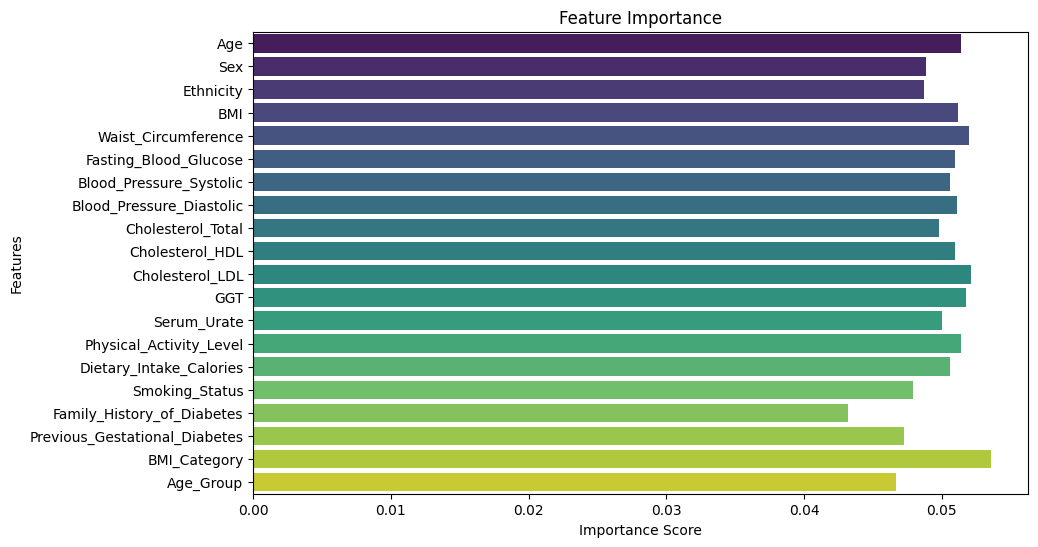

In [229]:
plt.figure(figsize=(10,6))
sns.barplot(x=imp_df['Importance'], y=imp_df['Feature'], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()